In [1]:
execfile('setting.py')

In [3]:
df_raw = pd.read_csv(path2+'Concrete.csv')
df_raw.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate  age  strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30

In [4]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)
print('train data size : {}'.format(df_train.shape))
print('test data size : {}'.format(df_test.shape))

train data size : (721, 9)
test data size : (309, 9)


In [5]:
# 회귀계수에 대한 검정은 VIT를 제외한 후 실시
reg_model = smf.ols(formula = "strength ~ cement + blast_furnace_slag + fly_ash + water + superplasticizer + coarse_aggregate + fine_aggregate + age ", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     144.7
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          9.94e-144
Time:                        09:23:28   Log-Likelihood:                -2714.7
No. Observations:                 721   AIC:                             5447.
Df Residuals:                     712   BIC:                             5489.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -55.7671     34

In [49]:
# y = -55.7671 +  0.1314 * coment + 0.1142 * blast_furnace_slag    ... 쭈욱

In [51]:
# 정규성 Prob 0.193 > 0.05보다 커서 정규성 따른다
# 등분산성 1.5 < Durbin-Watson < 2.5 사이 등분산성 따른다.

In [50]:
# R^2 0.615

In [7]:
df_train_x = df_train.drop('strength', axis = 1)
df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) 
                for i in range(df_train_x_const.shape[1])]

df_vif.sort_values("VIF", ascending = True).round(2)

variable      VIF
8                 age     1.12
5    superplasticizer     3.08
6    coarse_aggregate     5.34
3             fly_ash     6.60
4               water     7.80
7      fine_aggregate     7.94
2  blast_furnace_slag     7.97
1              cement     8.08
0               const  7550.34

In [43]:
## 오분류율
print(18/500) 
#민감도
print(27/40)
#특이도
print(27/32)
 # F1 Score
print((2*0.675*0.84375)/(0.675+0.84375))

0.036
0.675
0.84375
0.75


In [8]:
# 데이터 불러오기
df_raw = pd.read_csv(path2+"IRIS.csv")
df_raw.head()

SEPAL_LENGTH  SEPAL_WIDTH  PETAL_LENGTH  PETAL_WIDTH SPECIES
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [10]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw.drop("SPECIES", axis = 1, inplace = False)
df_raw_y = df_raw["SPECIES"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (150, 4)
분할 후 설명변수 데이터 :Train (105, 4)   Test (45, 4)


In [28]:
tree_final = DecisionTreeClassifier(max_depth=4, min_samples_split=10, min_samples_leaf=5, random_state=1234, criterion='entropy')
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       min_samples_split=10, random_state=1234)

In [29]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.962
Accuracy: 0.956

Confusion matrix: 
[[16  0  0]
 [ 0 16  1]
 [ 0  1 11]]
              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        16
  versicolor      0.941     0.941     0.941        17
   virginica      0.917     0.917     0.917        12

    accuracy                          0.956        45
   macro avg      0.953     0.953     0.953        45
weighted avg      0.956     0.956     0.956        45



In [41]:
# gini, entropy 0.962, 0.956으로 같다

In [17]:
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name

df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

Feature  Importance
2  PETAL_LENGTH       0.573
3   PETAL_WIDTH       0.427
0  SEPAL_LENGTH       0.000
1   SEPAL_WIDTH       0.000

In [45]:
# 설명변수 PETAL_LENGTH, PETAL_WIDTH

In [30]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 최대 이웃 수: 1~15
para_n_neighbors = [i for i in range(1, 11)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy
df_accuracy_neighbors.round(3)

Neighbors  TrainAccuracy  TestAccuracy
0          1          1.000         0.978
1          2          0.971         0.978
2          3          0.962         0.978
3          4          0.952         0.956
4          5          0.971         1.000
5          6          0.962         1.000
6          7          0.971         0.978
7          8          0.971         0.978
8          9          0.981         1.000
9         10          0.981         1.000

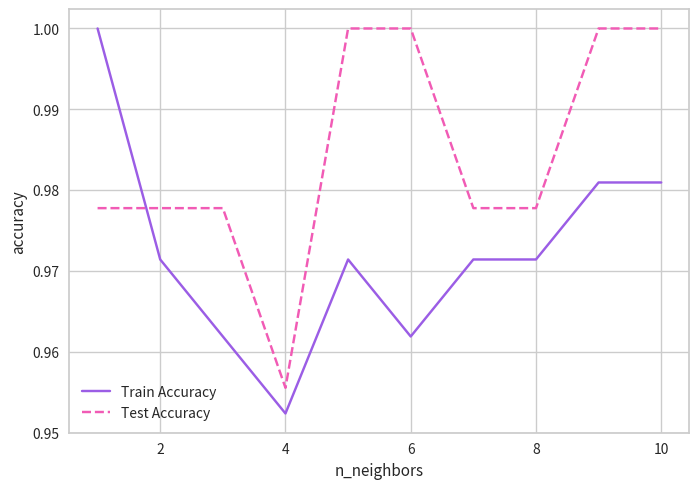

In [31]:
# 정확도를 그래프로 표현
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_neighbors")
plt.legend()

In [46]:
# 최정의 k = 2 선택하겠다.

In [32]:
df_raw = pd.read_csv(path1+'체질검사.csv')
df_raw.head()

FAT  AGE  WEIGHT  HEIGHT  NECK  CHEST  ABDOMEN    HIP  THIGH  KNEE  ANKLE  \
0  35.2   46  363.15   72.25  51.2  136.2    148.1  147.7   87.3  49.1   29.6   
1  11.8   27  168.00   71.25  38.1   93.0     79.1   94.5   57.3  36.2   24.5   
2  22.2   69  177.75   68.50  38.7  102.0     95.0   98.3   55.0  38.3   21.8   
3  10.6   57  147.75   65.75  35.2   99.6     86.4   90.1   53.0  35.0   21.3   
4  47.5   51  219.00   64.00  41.2  119.8    122.1  112.8   62.5  36.9   23.6   

   BICEPS  FOREARM  WRIST  
0    45.0     29.0   21.4  
1    29.0     30.0   18.8  
2    30.8     25.7   18.8  
3    31.7     27.3   16.9  
4    34.7     29.1   18.4

In [33]:
df_raw_x = df_raw.drop("FAT" ,axis=1)
df_raw_y = df_raw["FAT"]


0    35.2
1    11.8
2    22.2
3    10.6
4    47.5
Name: FAT, dtype: float64

In [34]:
# 뽀수 이름, 적장...
x_cols = df_raw_x.columns
# scale 변환 ndarray 형식
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
# 변환된 데이터 및 형태 확인
print("Scaled Data :\n {}".format(nd_scaled[:5].round(3)))
print("Shape :\n{}".format(nd_scaled.shape))

Scaled Data :
 [[ 0.089  6.281  0.575  5.444  4.205  5.161  6.685  5.324  4.366  3.841
   4.221  0.167  3.403]
 [-1.422 -0.372  0.301  0.044 -0.93  -1.25  -0.756 -0.402 -0.993  0.826
  -1.086  0.663  0.612]
 [ 1.917 -0.04  -0.451  0.292  0.14   0.227 -0.224 -0.841 -0.121 -0.77
  -0.489 -1.47   0.612]
 [ 0.963 -1.063 -1.203 -1.151 -0.146 -0.572 -1.371 -1.223 -1.492 -1.066
  -0.19  -0.676 -1.427]
 [ 0.486  1.366 -1.682  1.322  2.255  2.745  1.804  0.591 -0.702  0.294
   0.805  0.216  0.183]]
Shape :
(252, 13)


In [36]:
# DataFrame으로 저장
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)
# Scale 변한 데이터 효약 통계량
df_scaled.describe().round(3)

AGE   WEIGHT   HEIGHT     NECK    CHEST  ABDOMEN      HIP    THIGH  \
count  252.000  252.000  252.000  252.000  252.000  252.000  252.000  252.000   
mean     0.000    0.000    0.000   -0.000   -0.000   -0.000    0.000   -0.000   
std      1.002    1.002    1.002    1.002    1.002    1.002    1.002    1.002   
min     -1.820   -2.060  -11.120   -2.841   -2.558   -2.152   -2.085   -2.330   
25%     -0.726   -0.679   -0.519   -0.656   -0.769   -0.742   -0.616   -0.650   
50%     -0.150   -0.083   -0.041    0.003   -0.140   -0.149   -0.085   -0.077   
75%      0.725    0.616    0.575    0.591    0.541    0.629    0.506    0.562   
max      2.872    6.281    2.079    5.444    4.205    5.161    6.685    5.324   

          KNEE    ANKLE   BICEPS  FOREARM    WRIST  
count  252.000  252.000  252.000  252.000  252.000  
mean    -0.000   -0.000   -0.000    0.000    0.000  
std      1.002    1.002    1.002    1.002    1.002  
min     -2.323   -2.366   -2.479   -3.800   -2.608  
25%     -0.671   -0.652   -0.688   -0.676   -0.676  
50%     -0.038   -0.179   -0.074    0.018    0.075  
75%      0.554    0.531    0.680    0.663    0.612  
max      4.366    6.383    4.221    3.092    3.403

In [37]:
# 주성분 분석:추성분1 (Prin 1)~주성분6(Prin6) 생성 및 저장
pca = PCA(n_components=6)
nd_pca = pca.fit_transform(df_scaled)
# 생성된 주성분 점수 확인
print("PCA Data :\n{}".format(nd_pca[:5]))
# 생성된 주성분 점수 Row, Column 개수 확인
print("Shape :\n{}".format(nd_pca.shape))

PCA Data :
[[15.14078652  0.74918006  1.73038829  2.97562799 -1.20140416  1.91649244]
 [-1.25745311 -1.79805793 -0.60359147 -0.4059414   1.33324667  0.82223682]
 [-0.72744205  2.31886158 -0.89209681  0.68258035 -0.50328047  0.60020938]
 [-3.21015592  1.46511228  0.45790754 -0.57563715  0.01977212 -0.17880332]
 [ 3.24650172  2.29304235  1.82833929 -0.02336594 -0.40697879  1.14656798]]
Shape :
(252, 6)


In [38]:
# 주성분 점수 저장(Prin 1~Prin6, DataFrame형식) 및 확인
df_pca = pd.DataFrame(nd_pca, columns = ["Prin1", "Prin2", "Prin3", "Prin4", "Prin5", "Prin6"])
# 주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

AGE    WEIGHT    HEIGHT      NECK     CHEST   ABDOMEN       HIP  \
0  0.088660  6.280963  0.574790  5.444135  4.204531  5.161290  6.684808   
1 -1.422033 -0.372455  0.301235  0.044490 -0.929933 -1.250360 -0.755929   
2  1.917394 -0.040040 -0.451039  0.291802  0.139747  0.227107 -0.224448   
3  0.963272 -1.062856 -1.203313 -1.150851 -0.145501 -0.572026 -1.371328   
4  0.486211  1.366332 -1.682033  1.322269  2.255336  2.745306  1.803573   

      THIGH      KNEE     ANKLE    BICEPS   FOREARM     WRIST      Prin1  \
0  5.323774  4.366207  3.841274  4.220708  0.166666  3.402526  15.140787   
1 -0.401936 -0.993129  0.826247 -1.085611  0.662531  0.612020  -1.257453   
2 -0.840907 -0.120679 -0.769944 -0.488650 -1.469689  0.612020  -0.727442   
3 -1.222621 -1.491672 -1.065535 -0.190169 -0.676305 -1.427195  -3.210156   
4  0.590521 -0.702312  0.294183  0.804765  0.216252  0.182712   3.246502   

      Prin2     Prin3     Prin4     Prin5     Prin6  
0  0.749180  1.730388  2.975628 -1.201404  1.916492  
1 -1.798058 -0.603591 -0.405941  1.333247  0.822237  
2  2.318862 -0.892097  0.682580 -0.503280  0.600209  
3  1.465112  0.457908 -0.575637  0.019772 -0.178803  
4  2.293042  1.828339 -0.023366 -0.406979  1.146568

In [39]:
# 주성분 분석 통계량 저장:주성분 번호, Eigenvalue, Eigenvalue ratio
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [I for I in range(1,7)]
df_pca_stat["EigenValues"] = pca.explained_variance_
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

PrinNo  EigenValues  EigenValueRatio  CumEigenValueRatio
0       1        8.072            0.618               0.618
1       2        1.360            0.104               0.723
2       3        1.006            0.077               0.800
3       4        0.670            0.051               0.851
4       5        0.601            0.046               0.897
5       6        0.315            0.024               0.921

In [47]:
# 기여율 0.618

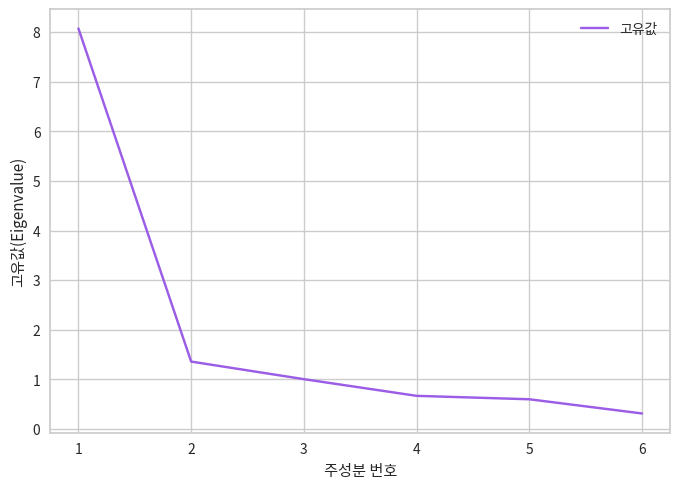

In [40]:
# Scree Plot
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], label="고유값")
# 그래프 label, legend 설정 
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend (loc="best")
1	2	0

In [52]:
# 주성분 개수 2// Scree plot 그래프 결과 elbow point